## 모델 불러오기

In [1]:
## 라이브러리 설치
##pip install trimesh

In [2]:
import trimesh

In [3]:
model = trimesh.load('./obj/model.stl')

In [4]:
model.show()

In [5]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
# model.merge_vertices()

In [6]:
## 변수에 저장
vertices = model.vertices

## 샘플 추출

https://trimesh.org/trimesh.sample.html

## 시각화

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

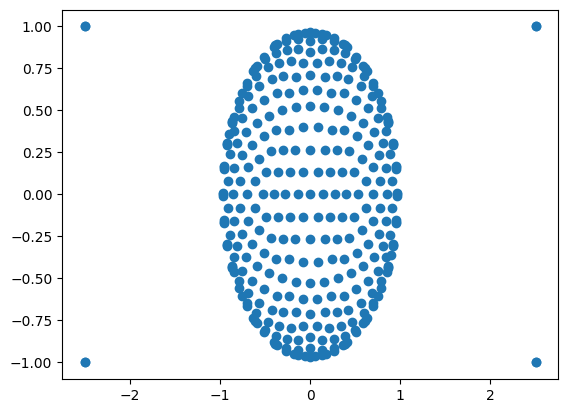

In [8]:
plt.scatter(vertices[:,0], vertices[:,1])

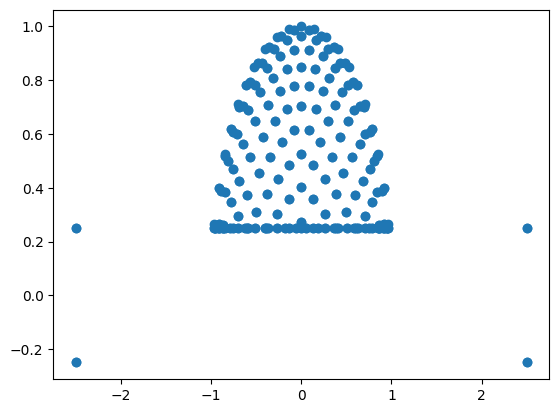

In [9]:
plt.scatter(vertices[:,0], vertices[:,2])

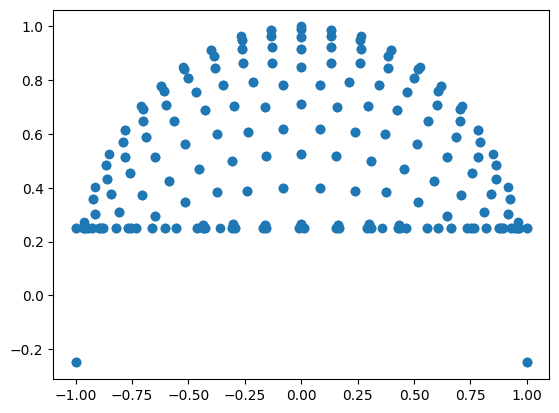

In [10]:
plt.scatter(vertices[:,1], vertices[:,2])

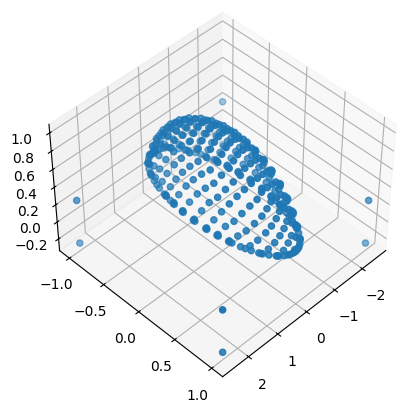

In [21]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])

In [175]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 50)
points = samples[0]
points

TrackedArray([[-0.52849705, -0.51803456,  0.66761434],
              [-0.90387506, -0.2253738 ,  0.35750936],
              [-1.66450208, -0.69012528, -0.25      ],
              [ 0.90283827,  0.30973168, -0.25      ],
              [ 1.18654268,  0.50722266,  0.25      ],
              [-2.5       , -0.90286712,  0.23632388],
              [ 0.56327979,  0.32147827,  0.75687839],
              [-0.81474631,  0.16021998, -0.25      ],
              [-1.43350503, -0.78257661,  0.25      ],
              [-2.30271173,  0.9895831 ,  0.25      ],
              [-2.0089631 ,  0.15052603, -0.25      ],
              [ 1.70694483,  0.52256988, -0.25      ],
              [-0.25835774, -0.56606615, -0.25      ],
              [-2.46743746,  0.13047034,  0.25      ],
              [ 0.2172617 ,  0.21268456, -0.25      ],
              [-0.36272612,  0.42370449, -0.25      ],
              [-1.42762366,  0.02190276, -0.25      ],
              [ 2.12480785,  0.83930222, -0.25      ],
          

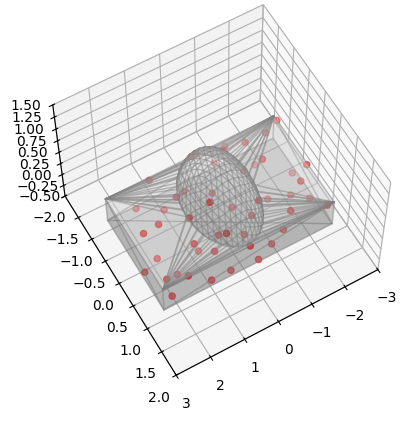

In [190]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red')
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

ax.view_init(elev=60, azim=60)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

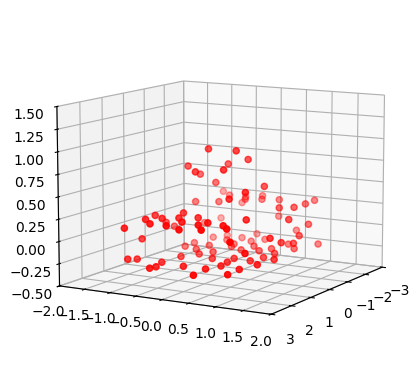

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

In [14]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt